# Australia Rainfall Exploratory Data Analysis

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/biodatlab/community-notebooks/blob/main/visualization/visualize_australia_rainfall.ipynb)

Visualizing Australia rainfall dataset using matplotlib, plotly, and dash

Reference: https://www.kaggle.com/code/zohrehtofighizavareh/australia-rainfall-eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/gchoi/Dataset/master/weatherAUS.csv"
)

In [3]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [4]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,36543.000000,36639.000000,36255.000000,24035.000000,23317.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,24381.000000,23899.000000,36394.000000,36437.000000,36261.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808,2.554748
std,6.389832,6.988266,9.081329,3.765427,3.833809,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.848750,2.663067,6.428328,6.820848,8.940267
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,0.000000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000,0.000000
50%,12.100000,22.300000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,0.000000
75%,17.000000,27.900000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000,0.800000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,367.600000


In [ ]:
data.drop(columns=["Sunshine", "Evaporation", "Cloud9am", "Cloud3pm"], inplace=True)

In [8]:
# Replace numerical columns with median
def replace_numerical(df1):
    for col in df1.select_dtypes(['int', 'float']):
        df1[col] = df1[col].fillna(df1[col].median())
    return df1

# Replace object columns with mode
def replace_object(df1):
    for col in df1.select_dtypes('object'):
        df1[col] = df1[col].fillna(method='ffill')
    return df1

In [9]:
data = replace_numerical(data)
data = replace_object(data)

In [10]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,NW,30.0,WSW,SSE,7.0,6.0,65.0,47.0,1023.1,1022.2,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,SSW,50.0,E,SW,7.0,24.0,99.0,46.0,1001.5,1002.4,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,SSE,41.0,SSE,SSE,19.0,31.0,48.0,50.0,1020.9,1021.9,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,SW,54.0,SSE,SW,28.0,33.0,50.0,41.0,1018.3,1014.9,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NNW,43.0,WNW,N,6.0,28.0,64.0,67.0,1020.3,1015.0,22.2,22.6,No,0.4,No


## Rainfall distribution each month

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data["Month"] = data.Date.map(lambda x: x.month)

In [ ]:
data.groupby("Month").agg({"Rainfall": "sum"}).plot(kind="bar", color="blue")
plt.title('Rainfall distribution in each month', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Rainfall (in mm)', fontsize=10)
plt.xticks(rotation=0)
plt.show()

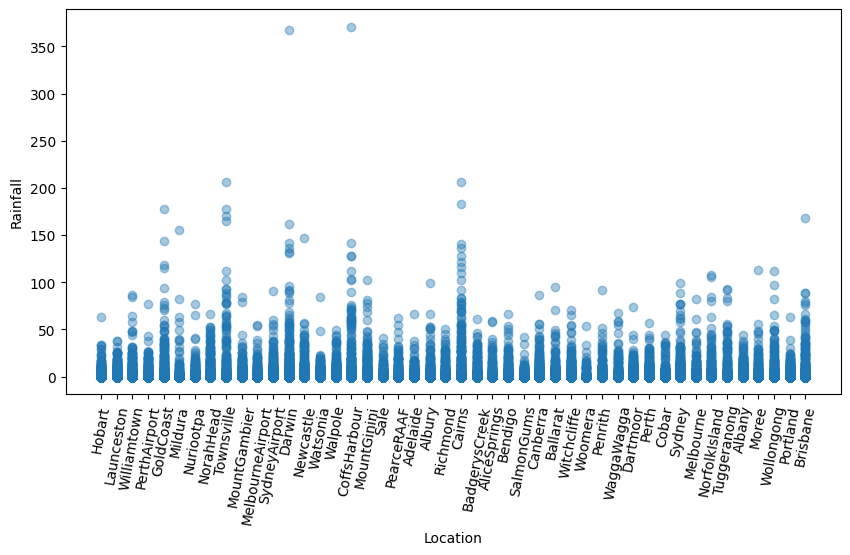

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(data['Location'], data['Rainfall'], alpha=0.4)
plt.xlabel("Location")
plt.xticks(rotation=80)
plt.ylabel("Rainfall")
plt.show()

## Min and Max Temperature based on location

In [13]:
min_temp_df = data.groupby('Location').agg({'MinTemp':'mean'})
max_temp_df = data.groupby('Location').agg({'MaxTemp':'mean'})

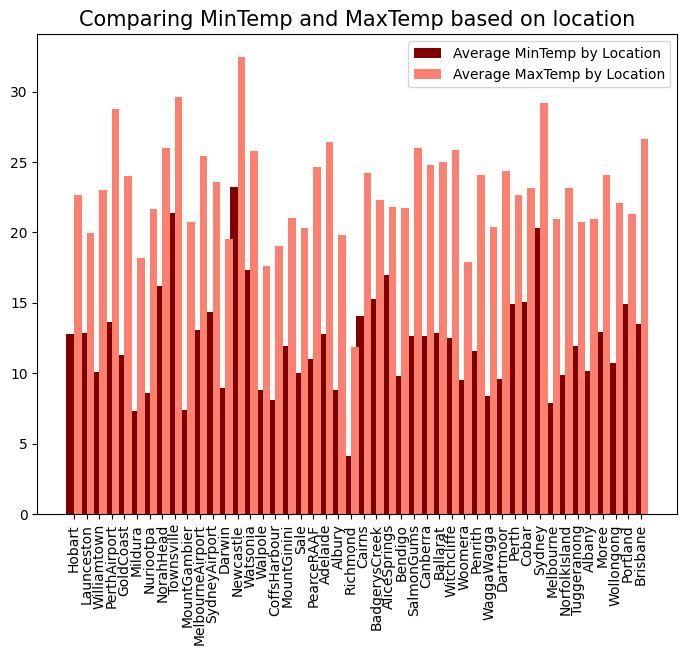

In [15]:
w = 0.6
x = np.arange(data['Location'].nunique())
locations = data["Location"].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x - w/2, min_temp_df[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x + w/2, max_temp_df[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)
ax.set_xticks(x)
ax.set_xticklabels(locations, rotation=90)
plt.title("Comparing MinTemp and MaxTemp based on location", fontsize=15)
plt.legend(fontsize=10)
plt.show()

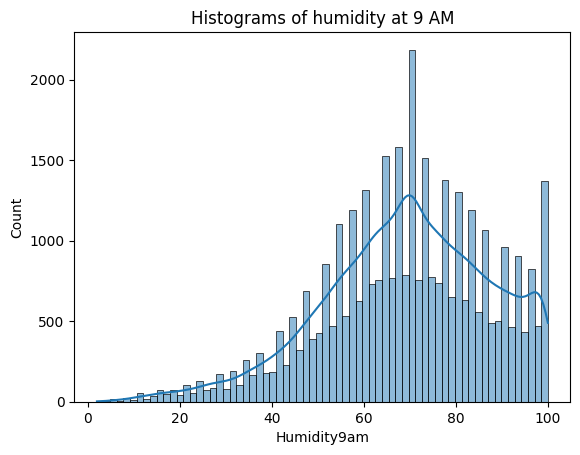

In [16]:
sns.histplot(data["Humidity9am"], kde=True)
plt.title('Histograms of humidity at 9 AM')
plt.show()

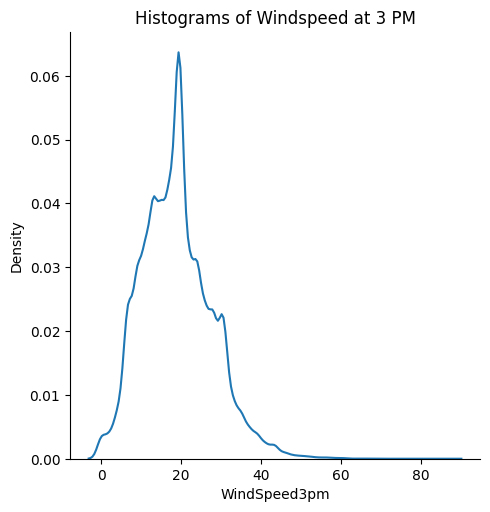

In [17]:
sns.displot(data["WindSpeed3pm"], kind="kde")
plt.title('Histograms of Windspeed at 3 PM')
plt.show()

## **Plotly**

In [59]:
import plotly.express as px
import plotly.graph_objects as go

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month
0,2009-05-18,Hobart,5.1,14.3,0.0,NW,30.0,WSW,SSE,7.0,...,65.0,47.0,1023.1,1022.2,9.1,13.3,No,0.0,No,5
1,2009-07-03,Launceston,1.1,14.5,0.4,SSW,50.0,E,SW,7.0,...,99.0,46.0,1001.5,1002.4,1.3,13.7,No,0.0,No,7
2,2010-02-18,Williamtown,19.7,26.2,0.0,SSE,41.0,SSE,SSE,19.0,...,48.0,50.0,1020.9,1021.9,22.7,24.4,No,0.2,No,2
3,2010-03-04,PerthAirport,16.6,28.0,0.0,SW,54.0,SSE,SW,28.0,...,50.0,41.0,1018.3,1014.9,20.0,26.1,No,0.0,No,3
4,2010-09-09,GoldCoast,14.6,25.3,0.0,NNW,43.0,WNW,N,6.0,...,64.0,67.0,1020.3,1015.0,22.2,22.6,No,0.4,No,9


In [35]:
rainfall_df = data.groupby("Month").agg({"Rainfall": "sum"}).reset_index()
rainfall_loc_df = data.groupby(["Month", "Location"]).agg({"Rainfall": "sum"}).reset_index()

In [37]:
rainfall_loc_df.head()

,Month,Location,Rainfall
0,1,Adelaide,41.2
1,1,Albany,92.1
2,1,Albury,84.4
3,1,AliceSprings,241.8
4,1,BadgerysCreek,169.4


In [32]:
fig = px.bar(rainfall_df, x="Month", y="Rainfall",
             labels={"Rainfall": "Total rainfall"},
             height=400)
fig.show()

In [39]:
rainfall_loc_df.head()

,Month,Location,Rainfall
0,1,Adelaide,41.2
1,1,Albany,92.1
2,1,Albury,84.4
3,1,AliceSprings,241.8
4,1,BadgerysCreek,169.4


In [63]:
fig_rainfall = px.bar(
    rainfall_loc_df, x="Month", y="Rainfall",
    labels={"Rainfall": "Total rainfall"},
    height=400,
    color="Location",
    title="Total rainfall by city"
)
fig_rainfall.show()

In [51]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rainfall_loc_df["Month_"] = rainfall_loc_df.Month.map(
    lambda x: months[x - 1]
)

In [56]:
min_temp_df = data.groupby('Location').agg({'MinTemp':'mean'}).reset_index()
max_temp_df = data.groupby('Location').agg({'MaxTemp':'mean'}).reset_index()

In [57]:
min_temp_df.head()

,Location,MinTemp
0,Adelaide,12.771477
1,Albany,12.879177
2,Albury,10.064654
3,AliceSprings,13.643687
4,BadgerysCreek,11.322716


In [67]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=min_temp_df.Location,
    y=min_temp_df.MinTemp,
    name='Minimum temperature',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=max_temp_df.Location,
    y=max_temp_df.MaxTemp,
    name='Maximum temperature',
    marker_color='lightsalmon'
))
fig.update_layout(
    title="City and Minumum/Maximum Rainfall",
    xaxis_title="City",
    yaxis_title="Minimum/Maximum Rainfall"
)

## **Use dash to combine all figures**

In [65]:
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
from dash import html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig),
    dcc.Graph(figure=fig_rainfall)
])

In [66]:
app.run_server(debug=True, use_reloader=False) 

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
